In [1]:
%load_ext autoreload
%autoreload 2

# Main setup
import imagej
ij = imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

from jpype import JClass
from scyjava import jimport
from src.utilities.imagerenderer import NotebookImageRenderer
from src.wrappers.coordinatesetwrapper import CoordinateSetFactoryWrapper
from src.wrappers.imagewrapper import ImageWrapper
from src.wrappers.metadatawrapper import MetadataWrapper
from src.wrappers.objwrapper import ObjFactoryWrapper
from src.wrappers.objswrapper import ObjsFactoryWrapper
from src.wrappers.volumewrapper import VolumeFactoryWrapper
from src.wrappers.workspacewrapper import WorkspaceWrapper

from src.modules.demomodule import ModuleDemo

import time

# Setting renderer
ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
ImageI.setGlobalRenderer(NotebookImageRenderer(ij))
ImageI.setUseGlobalImageRenderer(True)

# Setting objects factory (both obj and objs factories must be enabled together)
ObjsFactories = jimport('io.github.mianalysis.mia.object.ObjsFactories')
objs_factory = ObjsFactoryWrapper()
ObjsFactories.addFactory(objs_factory)
ObjsFactories.setDefaultFactory(objs_factory)

# Setting object factory (both obj and objs factories must be enabled together)
ObjFactories = jimport('io.github.mianalysis.mia.object.coordinates.ObjFactories')
obj_factory = ObjFactoryWrapper()
ObjFactories.addFactory(obj_factory)
ObjFactories.setDefaultFactory(obj_factory)

# Setting volume factory
VolumeFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.VolumeFactories')
volume_factory = VolumeFactoryWrapper()
VolumeFactories.addFactory(volume_factory)
VolumeFactories.setDefaultFactory(volume_factory)

# Setting coordinateset factory
CoordinateSetFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.CoordinateSetFactories')
coordinate_set_factory = CoordinateSetFactoryWrapper()
CoordinateSetFactories.addFactory(coordinate_set_factory)
CoordinateSetFactories.setDefaultFactory(coordinate_set_factory)

# Module imports
FilterImage = jimport('io.github.mianalysis.mia.module.images.process.FilterImage')
IdentifyObjects = jimport('io.github.mianalysis.mia.module.objects.detect.IdentifyObjects')
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')
ShowImage = jimport('io.github.mianalysis.mia.module.visualise.ShowImage')
MeasureObjectShape = jimport('io.github.mianalysis.mia.module.objects.measure.spatial.MeasureObjectShape')
ThresholdImage = jimport('io.github.mianalysis.mia.module.images.process.threshold.GlobalAutoThreshold')
AvailableModules = jimport('io.github.mianalysis.mia.module.AvailableModules')

# # Example of adding modules
# print(AvailableModules.getModuleNames(True).size())
# AvailableModules.addModuleName(ModuleDemo(None))
# print(AvailableModules.getModuleNames(False).size())

# # Example of loading a module through reflection
# cl = JClass(str(AvailableModules.getModuleNames(False).get(42)))
# cc = cl(None) # The module constructor
# print(cc.getShortDescription()) # Showing it's worked

[ERROR] Cannot create plugin: org.scijava.plugins.scripting.javascript.JavaScriptScriptLanguage


[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


Operating in headless mode - the original ImageJ will have limited functionality.


<java object 'io.github.mianalysis.mia.object.system.Status'>

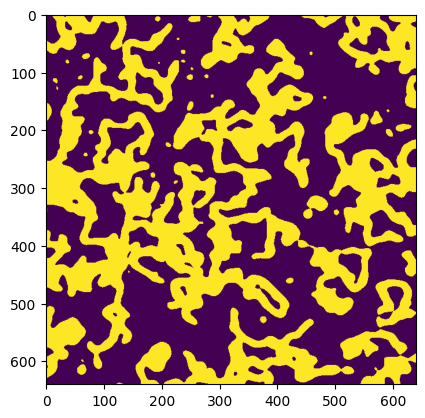

In [2]:
input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/Ex3_Skeletonisation.tif"
series_number = 1
image_name = "demo"
objects_name = "DNA"

workspace = WorkspaceWrapper(1, input_path, series_number, None)

imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, image_name)
imageLoader.setShowOutput(False)
imageLoader.process(workspace)

filterImage = FilterImage(None)
filterImage.updateParameterValue(FilterImage.INPUT_IMAGE, image_name)
filterImage.updateParameterValue(FilterImage.FILTER_MODE, FilterImage.FilterModes.GAUSSIAN2D)
filterImage.updateParameterValue(FilterImage.FILTER_RADIUS, 5)
filterImage.setShowOutput(False)
filterImage.process(workspace)

thresholdImage = ThresholdImage(None)
thresholdImage.updateParameterValue(ThresholdImage.INPUT_IMAGE, image_name)
thresholdImage.setShowOutput(True)
thresholdImage.process(workspace)

Here For Main Method
Here Start
<jpype._jproxy.proxy.ObjsWrapper object at 0x3397bbe30>Here A
Here B
Here C
Here D
Here F
Here G
Here H
Here I
IMPORTANT: Find out dimension order for np_img in Image class, but for now assuming XYCZT
Objs: Add applySpatioTemporalCalibration to created image (convertToImage)


Exception: ObjsWrapper: Implement showMeasurements

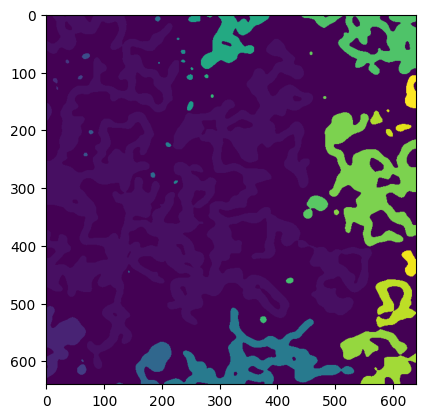

In [ ]:
identifyObjects = IdentifyObjects(None)
identifyObjects.updateParameterValue(IdentifyObjects.INPUT_IMAGE, image_name)
identifyObjects.updateParameterValue(IdentifyObjects.OUTPUT_OBJECTS, objects_name)
identifyObjects.updateParameterValue(IdentifyObjects.ENABLE_MULTITHREADING, False)
identifyObjects.setShowOutput(True)
identifyObjects.process(workspace)